In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
yt_ca = pd.read_csv('datasets/CA_youtube_trending_data.csv')
yt_ca.head(2)
# # yt_br.isna().any()
# # yt_br.info()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...


In [3]:
#First make the category of the video from json file
ca_category = pd.read_json('datasets/CA_category_id.json')
ca_category = ca_category['items']

#make a new dataframe that correspond to category on json files
genre_id= []
genre = []

for i in range(0, len(ca_category)-1):
    genre_id.append(str(ca_category[i]).split(", ")[2].split(': ')[-1].strip("'"))
    genre.append(str(ca_category[i]).split(", ")[3].split(': ')[-1].strip("'"))

genre = pd.DataFrame(list(zip(genre_id, genre)), columns=['id', 'genre']).set_index('id')
yt_ca['category'] = yt_ca['categoryId'].apply(lambda x : genre.loc[str(x)]['genre'] if x != 29 else "Nonprofits & Activism") 

#drop unrelated columns
yt_ca.drop(['categoryId', 'channelId', 'video_id', 'thumbnail_link'], axis=1, inplace=True)

#Then let's change the published and trending date format
yt_ca['publishedAt'] = pd.to_datetime(yt_ca['publishedAt'], format='%Y-%m-%dT%H:%M:%S')
yt_ca['trending_date'] = pd.to_datetime(yt_ca['trending_date'], format='%Y-%m-%dT%H:%M:%S')

In [6]:
yt_ca_trend = yt_ca.groupby('trending_date').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_ca_trend.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_ca_trend['date'] = date

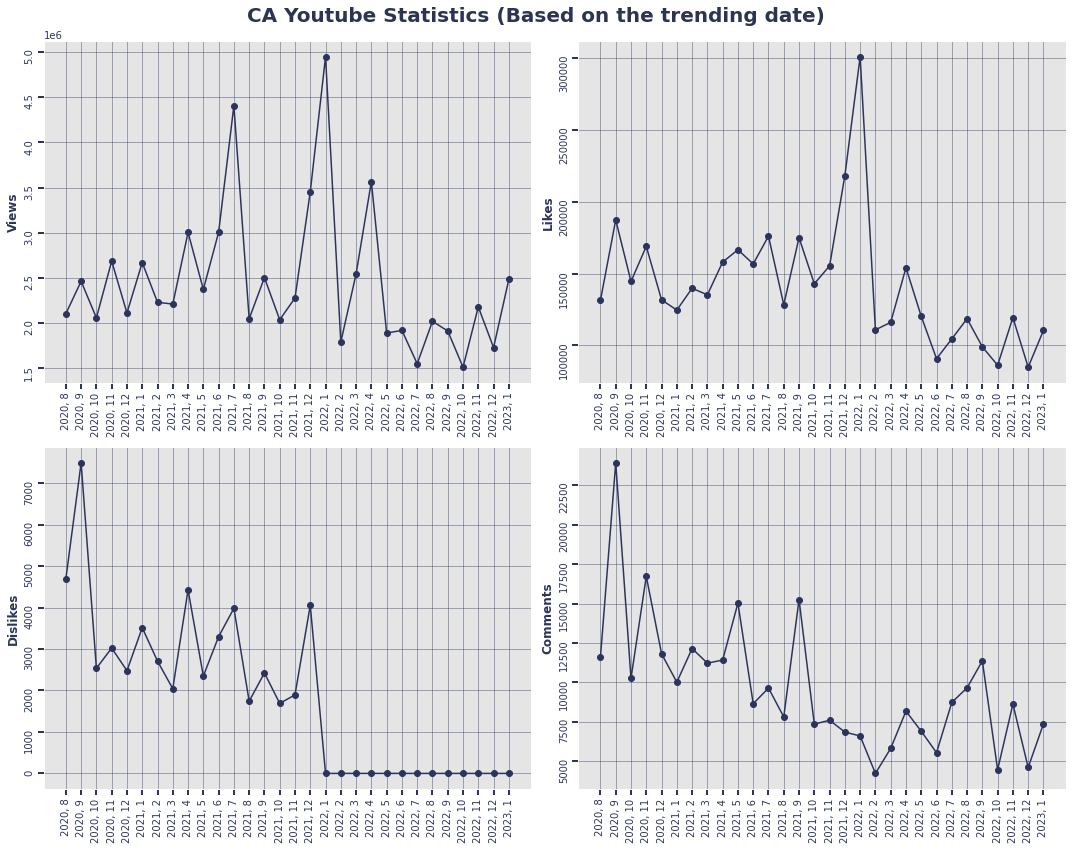

In [7]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_ca_trend['date'], yt_ca_trend['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_ca_trend['date'], yt_ca_trend['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_ca_trend['date'], yt_ca_trend['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_ca_trend['date'], yt_ca_trend['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("CA Youtube Statistics (Based on the trending date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

In [8]:
yt_ca_published = yt_ca.groupby('publishedAt').mean().groupby(lambda x: (x.year, x.month)).first()
date = []
for i in yt_ca_published.index:
    date.append(str(i).split(', ')[0].strip('(') + ", " + str(i).split(', ')[1].strip(')'))
yt_ca_published['date'] = date

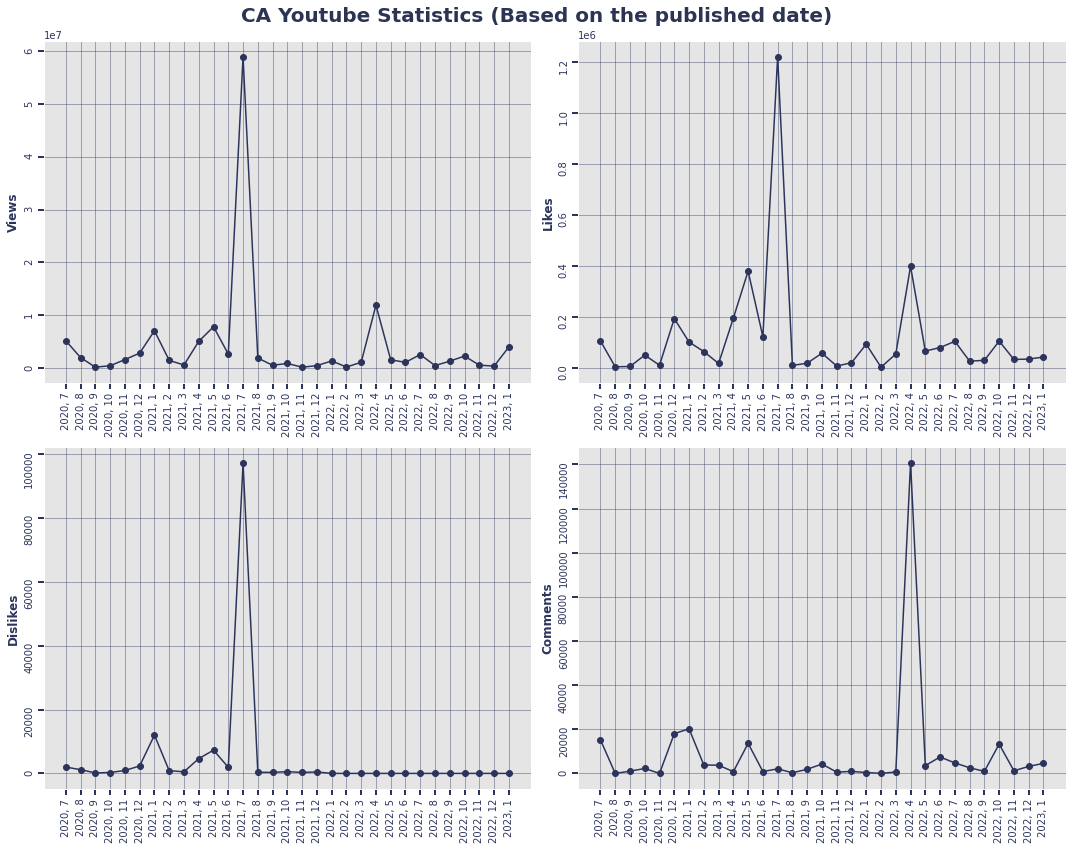

In [9]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 12]
color = '#2c345c'

fig, ax = plt.subplots(2, 2)
ax[0,0].plot(yt_ca_published['date'], yt_ca_published['view_count'], color=color, marker='o')
ax[0,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,0].set_ylabel('Views', fontweight='bold')
ax[0,0].yaxis.label.set_color(color)

ax[0,1].plot(yt_ca_published['date'], yt_ca_published['likes'], color=color, marker='o')
ax[0,1].tick_params(direction='out', length=6, width=2, colors='#2c345c',
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[0,1].set_ylabel('Likes', fontweight='bold')
ax[0,1].yaxis.label.set_color(color)

ax[1,0].plot(yt_ca_published['date'], yt_ca_published['dislikes'], color=color, marker='o')
ax[1,0].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,0].set_ylabel('Dislikes', fontweight='bold')
ax[1,0].yaxis.label.set_color(color)

ax[1,1].plot(yt_ca_published['date'], yt_ca_published['comment_count'], color=color, marker='o')
ax[1,1].tick_params(direction='out', length=6, width=2, colors=color,
               grid_color=color, grid_alpha=0.5, labelrotation=90)
ax[1,1].set_ylabel('Comments', fontweight='bold')
ax[1,1].yaxis.label.set_color(color)

plt.suptitle("CA Youtube Statistics (Based on the published date)", fontsize=20, fontweight='bold', color = '#2c3454')
plt.tight_layout()
plt.show()

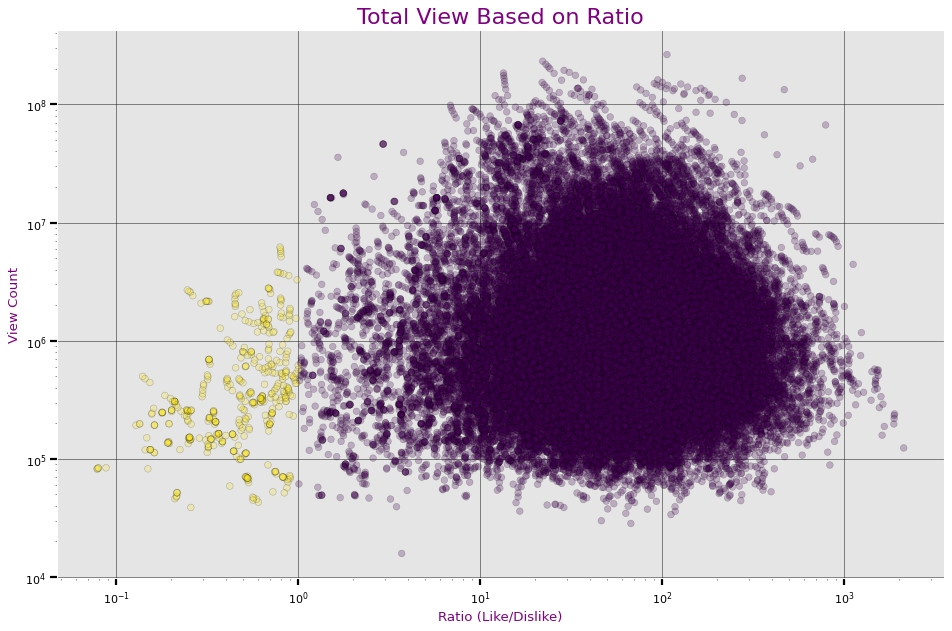

In [10]:
yt_ca['ratio'] = yt_ca['likes'] / yt_ca['dislikes']

plt.figure(figsize=(12, 8), dpi=80)

plt.scatter(yt_ca['ratio'], yt_ca['view_count'], c=yt_ca['ratio'] < 1, alpha=.25, edgecolors='black')
plt.xscale("log") 
plt.yscale("log")
plt.xlabel('Ratio (Like/Dislike)', fontsize=12, color='purple')
plt.ylabel('View Count', fontsize=12, color='purple')
plt.tick_params(direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5)

plt.title('Total View Based on Ratio', fontsize=20, color='purple')
plt.tight_layout()
plt.show()

In [11]:
yt_ca['day_to_trend'] = (yt_ca['trending_date'] - yt_ca['publishedAt']).dt.days
yt_ca['day_to_trend'].describe()

count    176343.000000
mean          2.872555
std           2.507705
min          -1.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          33.000000
Name: day_to_trend, dtype: float64

In [12]:
#Create a new df that spesifics to certain years
yt_ca_2020 = yt_ca[yt_ca.trending_date.dt.year == 2020]
yt_ca_2021 = yt_ca[yt_ca.trending_date.dt.year == 2021]
yt_ca_2022 = yt_ca[yt_ca.trending_date.dt.year == 2022]

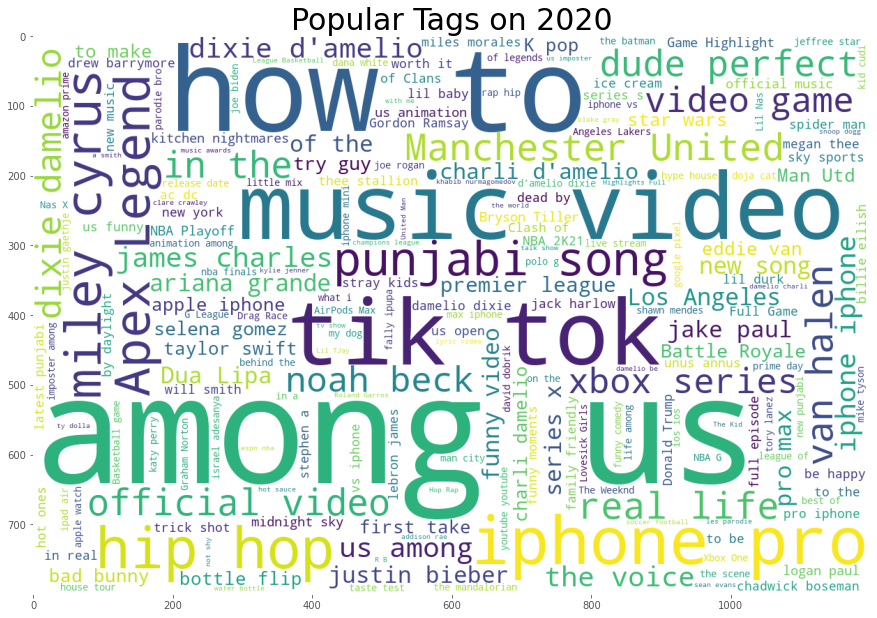

In [13]:
yt_ca_2020_tags = []

for i in yt_ca_2020['tags']:
    for j in str(i).split('|'):
        yt_ca_2020_tags.append(j)
ca_tags_2020 = " ".join([word for word in yt_ca_2020_tags])

ca_wc_2020 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(ca_tags_2020)
plt.title("Popular Tags on 2020", fontsize=30)
plt.grid(False)
plt.imshow(ca_wc_2020)

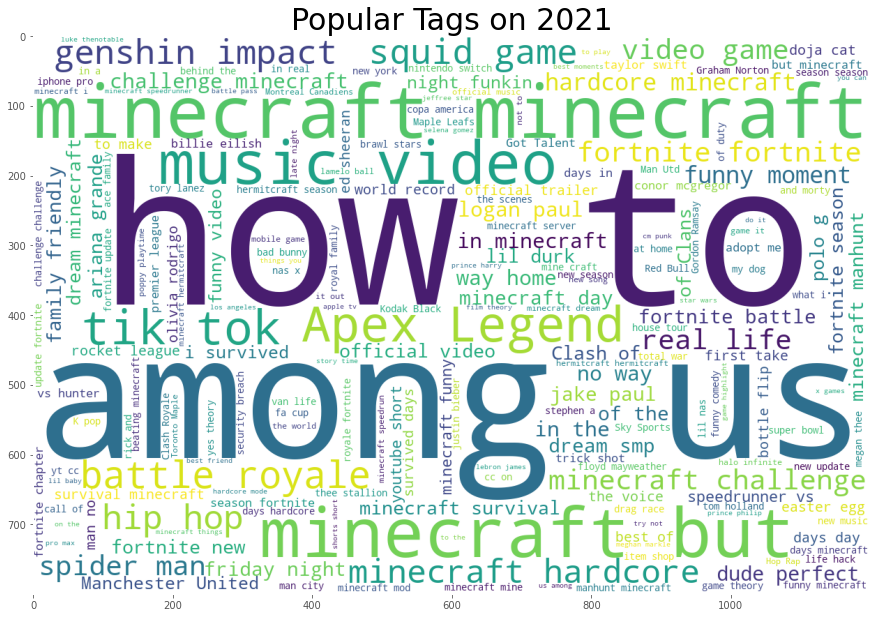

In [14]:
yt_ca_2021_tags = []

for i in yt_ca_2021['tags']:
    for j in str(i).split('|'):
        yt_ca_2021_tags.append(j)
ca_tags_2021 = " ".join([word for word in yt_ca_2021_tags])

ca_wc_2021 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(ca_tags_2021)
plt.title("Popular Tags on 2021", fontsize=30)
plt.grid(False)
plt.imshow(ca_wc_2021)

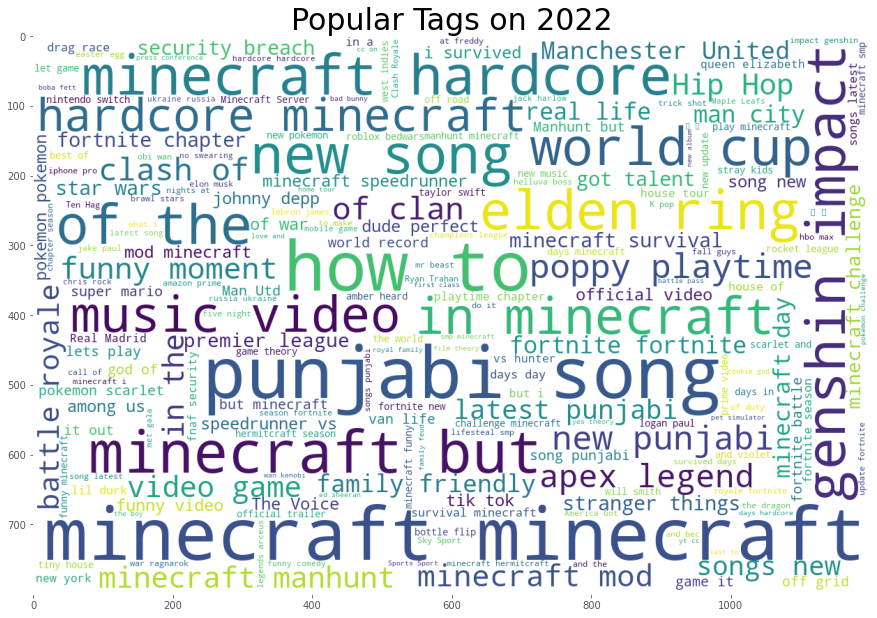

In [15]:
yt_ca_2022_tags = []

for i in yt_ca_2022['tags']:
    for j in str(i).split('|'):
        yt_ca_2022_tags.append(j)
ca_tags_2022 = " ".join([word for word in yt_ca_2022_tags])

ca_wc_2022 = WordCloud(background_color='white', height=800, width=1200, stopwords=['None']).generate(ca_tags_2022)
plt.title("Popular Tags on 2022", fontsize=30)
plt.grid(False)
plt.imshow(ca_wc_2022)

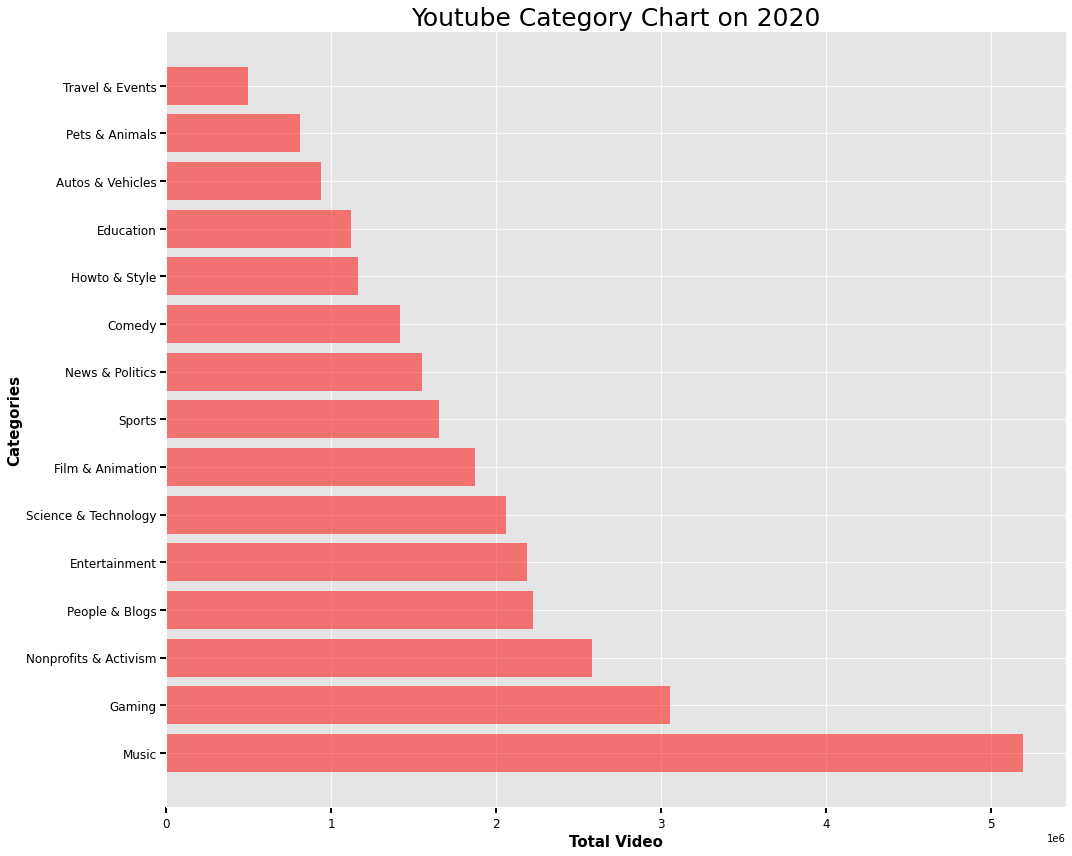

In [16]:
yt_ca_2020_category = yt_ca_2020.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_ca_2020_category.index, yt_ca_2020_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2020', fontsize=25)

plt.tight_layout()
plt.show()

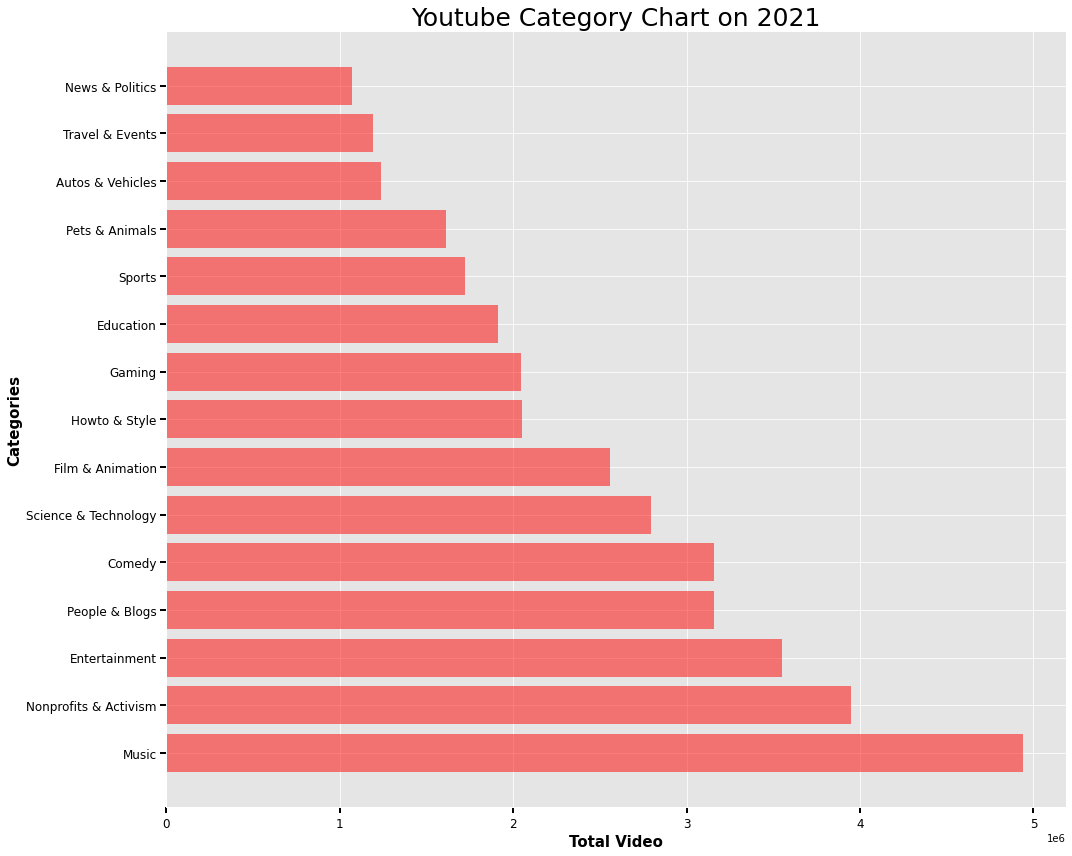

In [17]:
yt_ca_2021_category = yt_ca_2021.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_ca_2021_category.index, yt_ca_2021_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2021', fontsize=25)

plt.tight_layout()
plt.show()

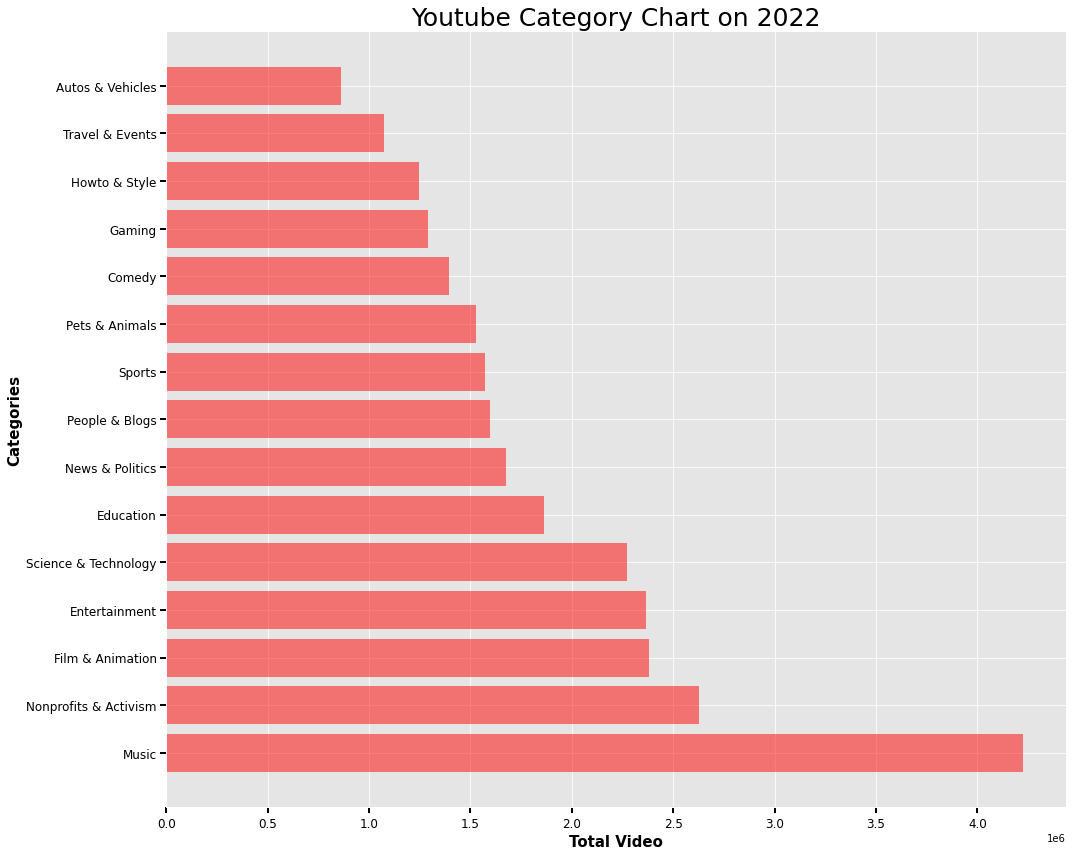

In [18]:
yt_ca_2022_category = yt_ca_2022.groupby('category').mean().sort_values('view_count', ascending=False)['view_count']

plt.barh(yt_ca_2022_category.index, yt_ca_2022_category, color='red', alpha=0.5)
plt.tick_params(axis='y', colors='black', labelsize=12)
plt.tick_params(axis='x', colors='black', labelsize=12)
plt.tick_params(direction='out', length=6, width=2, colors='black')
plt.ylabel('Categories', fontsize=15, fontweight='bold', color='black')
plt.xlabel('Total Video', fontsize=15, fontweight='bold', color='black')
plt.title('Youtube Category Chart on 2022', fontsize=25)

plt.tight_layout()
plt.show()